# Looking for a keyword-term pair and keyword in Congress

How much memory did you allocate for this session?  You will need at least 50 GB.

#### Import software packages and define helper functions

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
import numpy, re
from nltk.corpus import wordnet as wn
from textblob import TextBlob
import nltk

In [2]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /users/jguldi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Read in the data

In [3]:
cd /scratch/group/history/hist_3368-jguldi

/scratch/group/history/hist_3368-jguldi


In [4]:
congress = pd.read_csv("congress-just-1970-2010.csv")

This might take a minute.

In [5]:
congress

,Unnamed: 0,speech,chamber,date,speaker,first_name,last_name,state,year,5yrperiod,index
0,5369522,The second session of the 91st Congress will n...,S,1970-01-19,The PRESIDENT pro tempore,Unknown,Unknown,Unknown,1970,1970.0,5369522
1,5369523,Mr. President. I suggest the absence of a quorum.,S,1970-01-19,Mr. MANSFIELD,Unknown,MANSFIELD,Unknown,1970,1970.0,5369523
2,5369524,The clerk will call the roll.,S,1970-01-19,The PRESIDENT pro tempore,Unknown,Unknown,Unknown,1970,1970.0,5369524
3,5369525,I announce that the Senator from Connecticut ....,S,1970-01-19,Mr. KENNEDY,Unknown,KENNEDY,Unknown,1970,1970.0,5369525
4,5369526,I announce that the Senator from Colorado . th...,S,1970-01-19,Mr. GRIFFIN,Unknown,GRIFFIN,Unknown,1970,1970.0,5369526
...,...,...,...,...,...,...,...,...,...,...,...
5507434,10876956,Madam Speaker. on rollcall Nos. 662 and 661. I...,E,2010-12-22,Ms. GRANGER,Unknown,GRANGER,Unknown,2010,2010.0,10876956
5507435,10876957,Madam Speaker. as I leave Congress as the peop...,E,2010-12-22,Ms. KILPATRICK of Michigan,Unknown,KILPATRICK,Michigan,2010,2010.0,10876957
5507436,10876958,Madam Speaker. on rolicall No. 658. I was unav...,E,2010-12-22,Mr. HELLER,Unknown,HELLER,Unknown,2010,2010.0,10876958
5507437,10876959,Madam Speaker. on rollcall No. 658 my flight w...,E,2010-12-22,Mr. PAULSEN,Unknown,PAULSEN,Unknown,2010,2010.0,10876959


### Look for one word

In [8]:
word1 = "environmentalist"

contains_word1 = congress[congress['speech'].str.contains(word1)].copy() # search the text for the presence of our keyword 

### Look for another word

Next, let's look in contains_word1 for those speeches that also contain another term, which we'll call *word2*.

In [9]:
word2 = "kook"

contains_2words = contains_word1[contains_word1['speech'].str.contains(word2)].copy() # search the text for the presence of our keyword 

### Filter for a particular period

In [13]:
bothwords_1period = contains_2words[(contains_2words['year'] < 1975) & (contains_2words['year'] >= 1970)].copy() # search the text for the presence of our keyword 
bothwords_1period.head() 

,Unnamed: 0,speech,chamber,date,speaker,first_name,last_name,state,year,5yrperiod,index
109881,5479403,Mr. Speaker. I believe that my colleagues will...,E,1970-08-06,Mr. BURTON of Utah,Unknown,BURTON,Utah,1970,1970.0,5479403
257847,5627369,Mr. Speaker. in the S. Thompson. is Secretary ...,E,1971-06-30,Mr. HATHAWAY,Unknown,HATHAWAY,Unknown,1971,1970.0,5627369
403421,5772943,Mr. President. according to the Atomic Industr...,S,1972-05-01,Mr. GRAVEL,Unknown,GRAVEL,Unknown,1972,1970.0,5772943


In [14]:
bothwords_1period = contains_2words[(contains_2words['year'] < 1980) & (contains_2words['year'] >= 1975)].copy() # search the text for the presence of our keyword 
bothwords_1period.head() 

,Unnamed: 0,speech,chamber,date,speaker,first_name,last_name,state,year,5yrperiod,index
1016481,6386003,Everyone knows the Senator from California is ...,S,1975-10-01,Mr. HOLLINGS,Unknown,HOLLINGS,Unknown,1975,1975.0,6386003
1119641,6489163,Mr. President. I thank my distinguished collea...,S,1976-04-13,Mr. HOLLINGS,Unknown,HOLLINGS,Unknown,1976,1975.0,6489163


### Compare the results to another search

What if we look for how people talked about "kooks" when they *weren't* talked about environmentalists in the same period?

In [28]:
word2alone_bothperiods = bothwords_1period = congress[(congress['speech'].str.contains(word2)) & (congress['year'] < 1980) & (congress['year'] >= 1975)].copy() # search the text for the presence of our keyword 

word2alone_bothperiods.head()

,Unnamed: 0,speech,chamber,date,speaker,first_name,last_name,state,year,5yrperiod,index
874720,6244242,OF THE UNITED STATES. The White House. Washing...,E,1975-02-06,The PRESIDENT,Unknown,Unknown,Unknown,1975,1975.0,6244242
998022,6367544,Mr. Speaker. in recent months Congress and the...,E,1975-09-03,Mr. TEAGUE,Unknown,TEAGUE,Unknown,1975,1975.0,6367544
1001325,6370847,Mr. Speaker. I would like to take one moment t...,H,1975-09-10,Mr. SYMMS,Unknown,SYMMS,Unknown,1975,1975.0,6370847
1002486,6372008,Mr. Speaker. I would like to take a moment tod...,E,1975-09-10,Mr. SYMMS,Unknown,SYMMS,Unknown,1975,1975.0,6372008
1009638,6379160,Mr. Speaker. the obscene and sad gesture by th...,E,1975-09-23,Mr. NIX,Unknown,NIX,Unknown,1975,1975.0,6379160


### Saving the data as a file

As before, we can save the data as a file.

In [8]:
cd ~/

/users/jguldi


In [9]:
contains_word1.to_csv('kwic2.csv')

YOU decide which file to save -- bothwords_1period from 1970-75? from 1975-80? the other context?

### From CSV file to Microsoft Word Table

In the left-hand navigation pane, you should be able to see the new file.  

If you do not see a left-hand navigation pane, you probably loaded "JUPYTER NOTEBOOK" rather than "JUPYTER LAB" in the launch pane on hpc.smu.edu.  Just start a new JUPYTER LAB session from hpc.smu.edu and you should see the file. 

You can use LEFT CLICK / CONTROL+CLICK with your mouse to select the new file from the left pane.  

One of your options is "download."  Select this option to download the file.

Next, open Microsoft Excel on your own computer.  Choose FILE > IMPORT.  Tell your computer that you want to import a CSV file.  Then navigate to your downloads folder and find your new file.  If you are asked for any other parameters, choose the default. 

Once you have the data in Excel, select CTRL+A to highlight everything.  Select CTRL+C to copy it.  

Then create a Microsoft Word document and select CTRL+V to paste the new data as a table. 

You can now format the data however you want.

### Analyze the speeches

We can look just at the 'speech' column from our dataframe *contains_2words*.

In [10]:
contains_2words['speech']

109881     Mr. Speaker. I believe that my colleagues will...
257847     Mr. Speaker. in the S. Thompson. is Secretary ...
403421     Mr. President. according to the Atomic Industr...
1016481    Everyone knows the Senator from California is ...
1119641    Mr. President. I thank my distinguished collea...
3557892    Mr. Speaker. we have been through a very painf...
3910393    Mr. President. I thank the distinguished senio...
Name: speech, dtype: object

In [11]:
type(contains_2words['speech'])

pandas.core.series.Series

A 'Series' is just a fancy list with 'index' numbers (which you see to the left). We can turn the series into a normal list with the command "to_list()".

In [12]:
listed_speeches = contains_2words['speech'].to_list()

look at the first speech.

In [13]:
listed_speeches[0][:100]

'Mr. Speaker. I believe that my colleagues will find the following finely detailed article by Theodor'

We can use the code from our counting notebook to remove stopwords, lowercase the text, remove punctuation, and count the words. 

Load stopwords:

In [18]:
from nltk.corpus import stopwords

stopwords = stopwords.words('english')

I am making an extra stopwords list. You will want to add your own to increase the interpretability of the results. The extra word list should contain all words that are likely to occur in other speeches that aren't specifically about kooks and the environment.

In [31]:
extrawords = ['there', 'say', 'year', 'over', 'get', 'an', 'he', 'up', 'no', 'go', 'about', 'one', 'house', 'gas', 'come', 'state', 'some',
              'senator', 'new', 'know', 'more', 'here', 'president', 'make', 'american', 'right', 'want' ,'take', 'think', 'going', 'like', 'let', 'government', 'mr.', 'unite', 'first', 'many', 'committee', 'believe', 'call', 'way', 'see', 'world', 'congress', 'vote', 'tax', 'need', 'senate', 
              'america', 'member', 'tell', 'back', 'also', 'today', 'point', 'every', 'ask', 'two', 'work,' 'may','must', 'put', 'control',
             'house', 'be', 'in', 'have', 'it', 'are', 'on', 'not', 'by', 'wa', 'but', 'do', 'as', 'ha', 'or',
              'kind', 'speaker', 'thing', 'much', 'attempt', 'may', 'group', 'chairman', 'raise', 'well', 'look', 'legislation', 'statement', 'expenditure',
              'all', 'at', 'have', 'say', 'know', 'go', 'time', 'bill', 'federal', 'country', 'national', 'last', 'get', 'go', 'one', 'come', 'new', 'try', 'say', 'mr', 'state', 'us', 'mr', 'say', 'know', 'use', 'even', 'last', 'come', 'president', 'people', 'years', 'year']

In [26]:
lemmas = []

for speech in listed_speeches:
    speech = speech.replace('\n', '') # get rid of extra whitespace
    for word in speech.lower().split(): # loop through every word
        if len(word) > 1: # get rid of short words
            for c in string.punctuation: # strip punctuation
                word = word.replace(c, "") 
                lemma = wn.morphy(word) # lemmatize
                if lemma != None: # get rid of nonetype elements generated by wordnet
                    lemmas.append(lemma) # save the good results

lemma_count = pd.Series.value_counts(lemmas) # count them

In [27]:
lemma_count

be                9720
in                8793
have              5189
it                3963
are               2681
                  ... 
forum               17
ms.                 13
attitude            12
limb                12
misinformation      12
Length: 2145, dtype: int64

It might take a minute. let it run.

In [43]:
stopworded = []

for i in range(0, len(lemmas)-1):
    lemma = lemmas[i]
    if lemma not in stopwords:
        if lemma not in extrawords:
    #for stopword in stopwords: #eliminate stopwords
       # if lemma != stopword:  
        #    for extraword in extrawords: #eliminate extra words
         #       if lemma != extrawords:
                    stopworded.append(lemmas[i])

stopworded_count = pd.Series.value_counts(stopworded) # count them
stopworded_count[:50]

tax              1644
billion          1551
regulation        932
oil               908
carolina          785
senate            767
maine             757
power             697
natural           640
american          595
increase          582
budget            574
environmental     544
million           537
percent           531
nuclear           530
south             499
point             492
environment       486
warming           485
much              480
clean             480
north             480
free              480
want              480
disc              473
moratorium        465
public            454
water             454
control           454
industry          453
global            448
make              448
plant             440
two               435
enterprise        435
yankee            420
concern           416
put               416
many              416
cause             403
back              403
revenue           390
air               384
price             383
good      

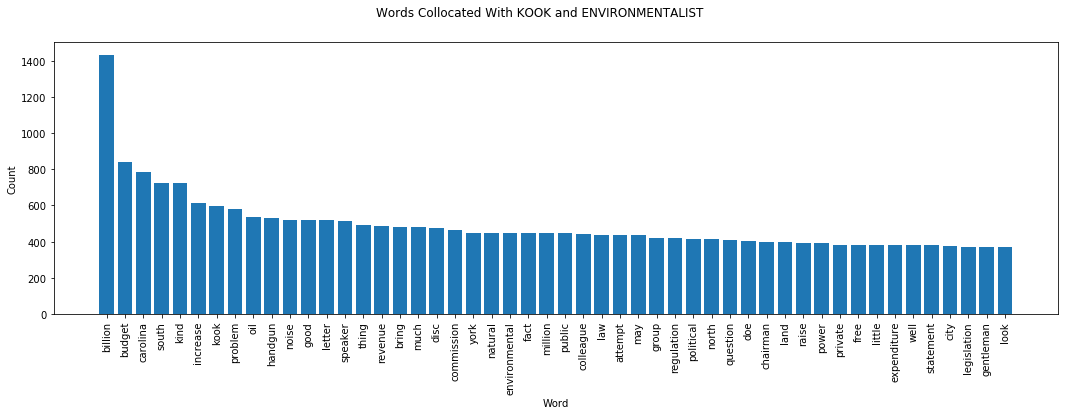

In [32]:
# a well-labeled barplot
f, ax = plt.subplots(figsize=(18,5))
plt.bar(list(stopworded_count[:50].index), stopworded_count[:50])
plt.xticks(rotation=90) # this tells Python to 'rotate' the labels on the x axis so that the words fit on the screen
plt.savefig('bar.png') # this line tells Python to save a copy in your digital-history folder
plt.xlabel('Word') # this line labels the x axis
plt.ylabel('Count') # this line labels the y axis
plt.suptitle('Words Collocated With KOOK and ENVIRONMENTALIST') #This line labels the title
plt.show()

Do these words give you a thumbnail understanding of in what context the terms 'kook' and 'environmentalist' appeared together?  If not, adjust the extrawords list and try again!

### Compare Your Results to Another Query

We can also ask: how did speakers use the word "kook" when they *weren't* talking about environmentalists?

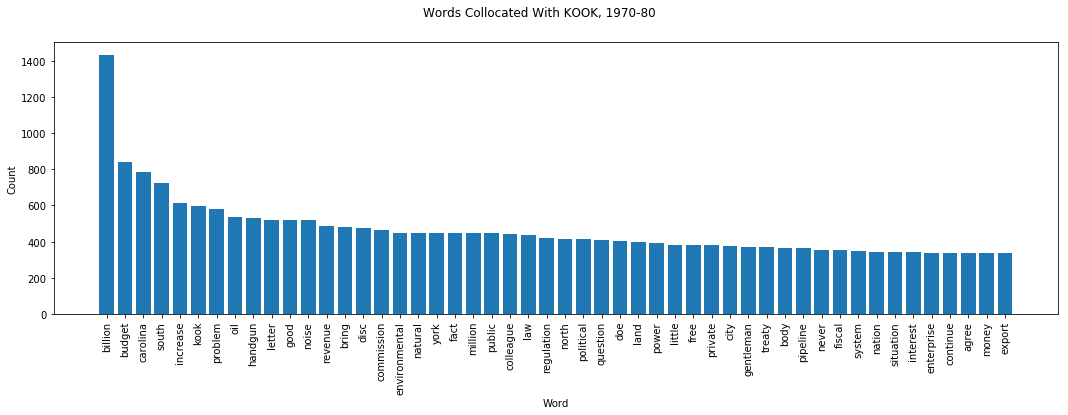

In [33]:
listed_speeches = word2alone_bothperiods['speech'].to_list()

lemmas = []

for speech in listed_speeches:
    speech = speech.replace('\n', '') # get rid of extra whitespace
    for word in speech.lower().split(): # loop through every word
        if len(word) > 1: # get rid of short words
            for c in string.punctuation: # strip punctuation
                word = word.replace(c, "") 
                lemma = wn.morphy(word) # lemmatize
                if lemma != None: # get rid of nonetype elements generated by wordnet
                    lemmas.append(lemma) # save the good results

lemma_count = pd.Series.value_counts(lemmas) # count them

stopworded = []

for i in range(0, len(lemmas)-1):
    lemma = lemmas[i]
    if lemma not in stopwords:
        if lemma not in extrawords:
    #for stopword in stopwords: #eliminate stopwords
       # if lemma != stopword:  
        #    for extraword in extrawords: #eliminate extra words
         #       if lemma != extrawords:
                    stopworded.append(lemmas[i])

stopworded_count = pd.Series.value_counts(stopworded) # count them

# a well-labeled barplot
f, ax = plt.subplots(figsize=(18,5))
plt.bar(list(stopworded_count[:50].index), stopworded_count[:50])
plt.xticks(rotation=90) # this tells Python to 'rotate' the labels on the x axis so that the words fit on the screen
plt.savefig('bar.png') # this line tells Python to save a copy in your digital-history folder
plt.xlabel('Word') # this line labels the x axis
plt.ylabel('Count') # this line labels the y axis
plt.suptitle('Words Collocated With KOOK, 1970-80') #This line labels the title
plt.show()

Does this allow you to answer the question: did members of Congress *only* or *disproportionately* apply the term 'kook' to environmentalists?   In what other contexts was the word 'kook' used?
    
What next steps would you take to answer that question? Feel free to tweak the code or add more code here. 

You might also want to answer the question by looking at the KWIC file generated from the dataframe *word2alone_bothperiods*.

### Ngrams

In what phrases does the term 'kook' appear alongside the keyword 'environmentalist'?

In [48]:
bigrams = []

for speech in listed_speeches:
    speech = speech.replace('\n', '') # get rid of extra whitespace
    speech_bigrams = TextBlob(speech).ngrams(n=2)
    for bigram in speech_bigrams:
            if bigram[0] not in stopwords:
                if bigram[1] not in stopwords:
                    bigram2 = bigram[0] + ' ' + bigram[1] # call the first word, a space, and the second word into a new string
                    if word2 in bigram2:            
                        bigrams.append(bigram2)

bigram_count = pd.value_counts(bigrams)
bigram_count[:20]

kookie environmentalists    1
kookout Representative      1
kooks No                    1
kookie regulation           1
kooks When                  1
gone kooky                  1
dtype: int64

We could make a barplot, but it won't be very interesting because the bigrams only appear once.

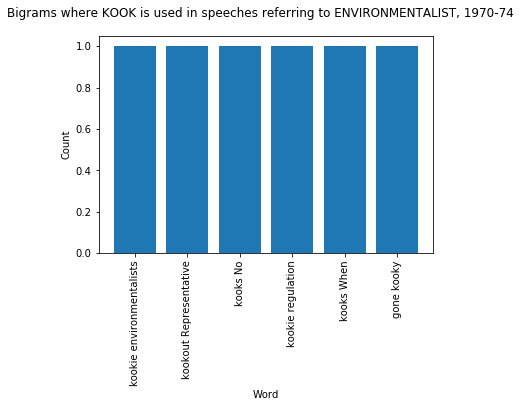

In [54]:
# a well-labeled barplot
plt.bar(list(bigram_count[:20].index), bigram_count[:20])
plt.xticks(rotation=90) # this tells Python to 'rotate' the labels on the x axis so that the words fit on the screen
plt.savefig('bar.png') # this line tells Python to save a copy in your digital-history folder
plt.xlabel('Word') # this line labels the x axis
plt.ylabel('Count') # this line labels the y axis
plt.suptitle('Bigrams where KOOK is used in speeches referring to ENVIRONMENTALIST, 1970-74') #This line labels the title
plt.show()

Let's compare the results to how members of Congress used the word 'kook' overall during the period 1970-1975:

In [34]:
all_congress_bigrams = []

for speech in word2alone_bothperiods['speech']:
    speech = speech.lower().replace('\n', '') # get rid of extra whitespace
    speech_bigrams = TextBlob(speech).ngrams(n=2)
    for bigram in speech_bigrams:
            bigram2 = bigram[0] + ' ' + bigram[1] # call the first word, a space, and the second word into a new string
            if word2 in bigram2:            
                    all_congress_bigrams.append(bigram2)

all_congress_bigram_counts = pd.value_counts(all_congress_bigrams)
all_congress_bigram_counts[:20]

kook and            4
every kook          4
of kooks            3
skookum paper       2
kooky but           2
these kooks         2
kooks and           2
kooks or            2
a skookum           1
kooks as            1
schooner skookum    1
as skookum          1
kooks is            1
nuts kooks          1
some kookie         1
gone kooky          1
for kooky           1
kooks for           1
few kooks           1
kooky when          1
dtype: int64

You can adjust the dates (1970, 1975) and term ("kook") in the code above to search for bigrams containing your term in different periods.

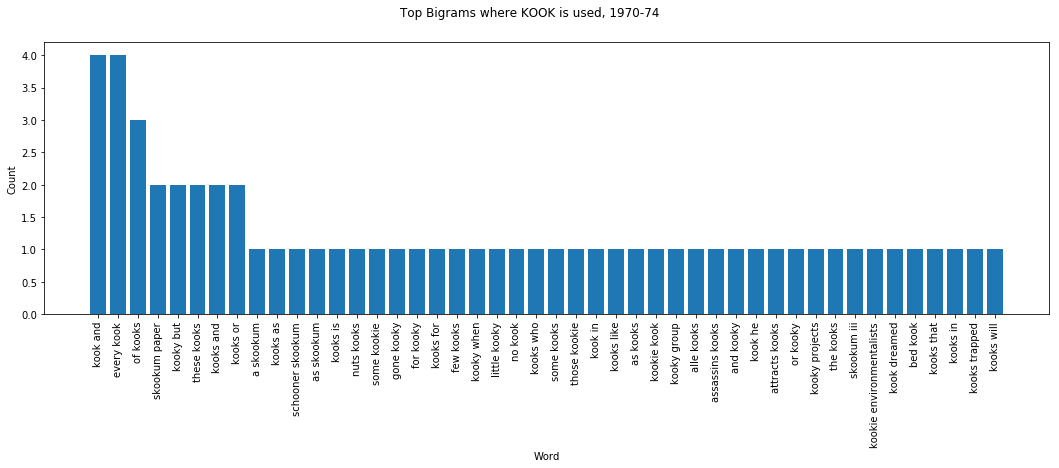

In [35]:
# a well-labeled barplot
f, ax = plt.subplots(figsize=(18,5))
plt.bar(list(all_congress_bigram_counts[:50].index), all_congress_bigram_counts[:50])
plt.xticks(rotation=90) # this tells Python to 'rotate' the labels on the x axis so that the words fit on the screen
plt.savefig('bar.png') # this line tells Python to save a copy in your digital-history folder
plt.xlabel('Word') # this line labels the x axis
plt.ylabel('Count') # this line labels the y axis
plt.suptitle('Top Bigrams where KOOK is used, 1970-80') #This line labels the title
plt.show()